# Calculation of Ground state fraction and density distribution for noninteracting bosons as a function of temperature in the semiclassical limit

We are not in the semiclassical limit, but this should be a good reference.

Mostly coming from "Theory of Bose-Einstein Condensation in Trapped Gases" By Franco Dalfovo et al.

$$
k_B T_C \approx 0.94 \hbar \omega_{ho} N^{1/3}
$$

$$
\frac{N_0}{N} = 1 -\Big(\frac{T}{T_C}\Big)^3
$$

In [214]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('dark_background')
import Miscellaneous as misc
import MarksConstants as mc

In [75]:
def gs_frac(tempRatio):
    return max([1 - tempRatio**3, 0])

In [78]:
def T_c(omega, N):
    return 0.94*mc.hbar*omega*N**(1/3)/mc.k_B

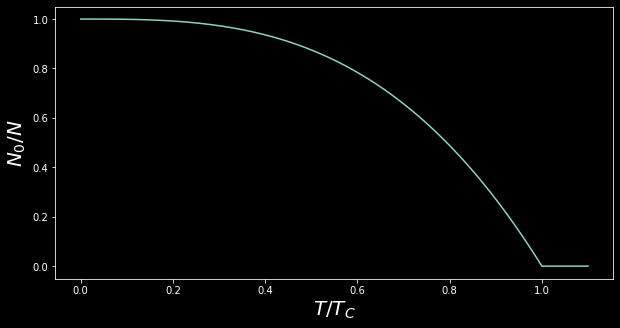

In [77]:
tempRatios = np.linspace(0,1.1,1000)
gsf = [gs_frac(tempRatio) for tempRatio in tempRatios]
f, ax = plt.subplots(figsize=(10,5))
ax.plot(tempRatios, gsf)
fs = 20
ax.set_xlabel('$T / T_C$', fontsize=fs)
ax.set_ylabel('$N_0/N$', fontsize=fs);

Equation (18) in above paper

In [133]:
[x for x in range(1,2)]

[1]

In [146]:
def gfunc(a, arg):
    return np.sum([arg**n / n**a for n in range(1,2)])
def thermalDensity(x, T, omega_x):
    thermal_wavelength = np.sqrt(2*np.pi*mc.hbar**2 / (mc.Rb87_M * mc.k_B * T))
    def V_(x_):
        return 0.5*mc.Rb87_M * omega_x**2 * x_**2
    # adding power of 1/3 here because only 1D
    return [(thermal_wavelength**(-3)*gfunc(3/2, np.exp(-(mc.k_B*T)**(-1)*V_(x_))))**(1/3) for x_ in x]

In [147]:
def gs_density(x, omega_x):
    return ((mc.Rb87_M*omega_x/(mc.hbar*np.pi))**(1/4)*np.exp(-mc.Rb87_M*omega_x*x**2/(2*mc.hbar)))**2

In [232]:
npts = 1000
xpts = np.linspace(-0.5e-6, 0.5e-6, npts)
tc = T_c(omega_x, 5)
temp = 0.5*tc
print(gs_frac(temp/tc))
omega_x = 150e3*np.pi*2
#thermal = (1-gs_frac(temp/tc))*np.array(thermalDensity(xpts,temp,omega_x))
dx_o_N = (max(xpts) - min(xpts)) / npts
thermal = np.array(thermalDensity(xpts,temp,omega_x))
gsf = gs_frac(temp/tc)
thermal *= (1-gsf)/(np.sum(thermal)*dx_o_N)
gsd = gsf*gs_density(xpts,omega_x)
print(np.sum(thermal)*dx_o_N, np.sum(gsd)*dx_o_N)

0.875
0.12499999999999999 0.8741249999999997


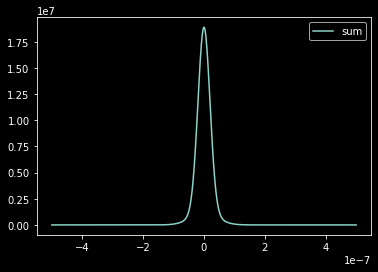

In [233]:
fig, ax = plt.subplots()
#ax.plot(xpts,thermal, label='thermal')
#ax.plot(xpts, gsd, label='gs')
ax.plot(xpts, gsd+thermal, label='sum')
ax.legend()